In [8]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
import json

In [2]:
heart = pd.read_csv('../../Kaggle_DB/Daniel/heart_disease_health_indicators_BRFSS2015.csv')

In [3]:
#heart = heart.fillna(0)

heart.head()


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
heart2=heart[['BMI','HeartDiseaseorAttack','HighBP','HighChol','Stroke','Diabetes']]
heart2.head()

,BMI,HeartDiseaseorAttack,HighBP,HighChol,Stroke,Diabetes
0,40.0,0.0,1.0,1.0,0.0,0.0
1,25.0,0.0,0.0,0.0,0.0,0.0
2,28.0,0.0,1.0,1.0,0.0,0.0
3,27.0,0.0,1.0,0.0,0.0,0.0
4,24.0,0.0,1.0,1.0,0.0,0.0


In [6]:
heart2.rename(columns={'HeartDiseaseorAttack':'심장질환','HighBP':'고혈압','HighChol':'고지혈','Stroke':'뇌졸증','Diabetes':'당뇨'})

,BMI,심장질환,고혈압,고지혈,뇌졸증,당뇨
0,40.0,0.0,1.0,1.0,0.0,0.0
1,25.0,0.0,0.0,0.0,0.0,0.0
2,28.0,0.0,1.0,1.0,0.0,0.0
3,27.0,0.0,1.0,0.0,0.0,0.0
4,24.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...
253675,45.0,0.0,1.0,1.0,0.0,0.0
253676,18.0,0.0,1.0,1.0,0.0,2.0
253677,28.0,0.0,0.0,0.0,0.0,0.0
253678,23.0,0.0,1.0,0.0,0.0,0.0


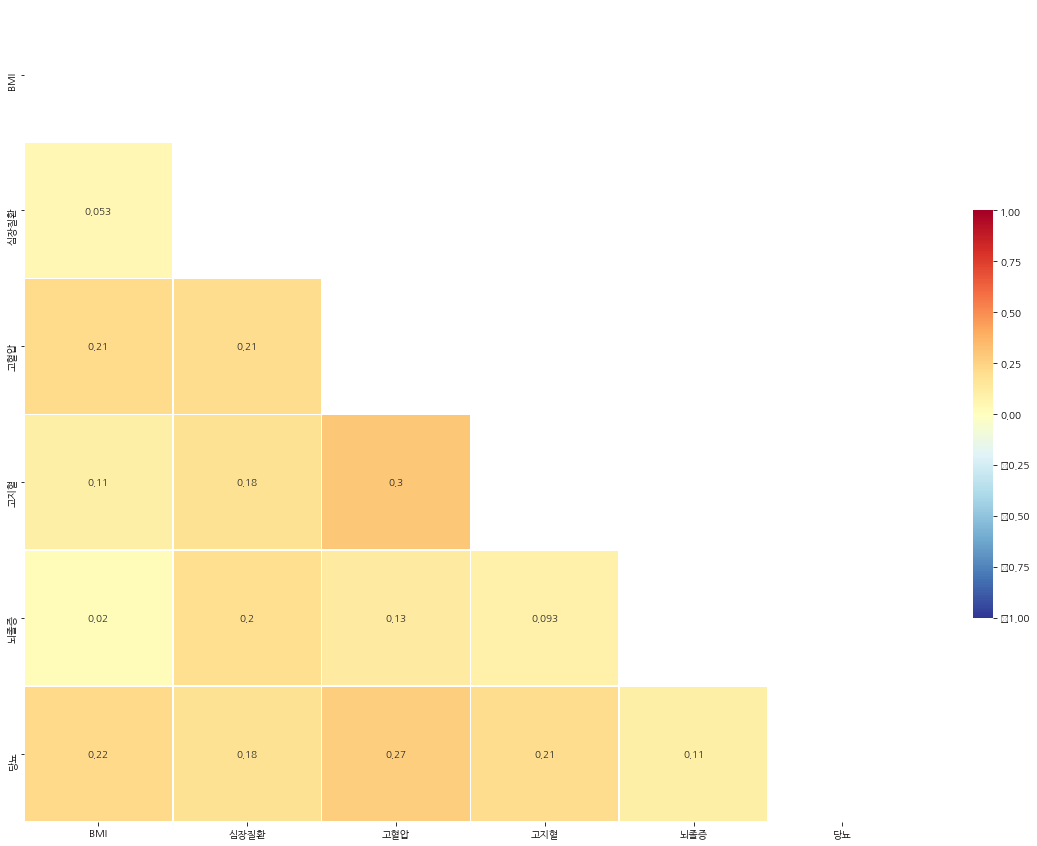

In [10]:
heart_corr=heart2.corr()
fig,ax = plt.subplots(figsize=(20,15))
mask = np.zeros_like(heart_corr,dtype=bool)
mask[np.triu_indices_from(mask)] = True
HDA=mask[np.triu_indices_from(mask)][0]
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(heart_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": 0.5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )

plt.show()

<AxesSubplot:>

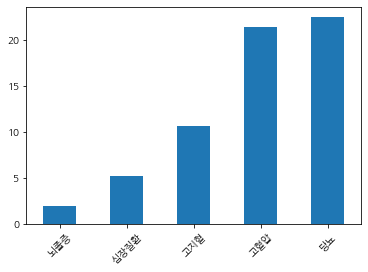

In [11]:
(heart_corr['BMI'].sort_values().drop(labels="BMI")*100).plot.bar(rot=45)


In [16]:
result=(heart_corr['BMI'].sort_values().drop(labels="BMI")*100).to_json()
file = json.dumps(result,indent=4)
with open("Obesity_disease.json","w") as outfile :
        outfile.write(file)

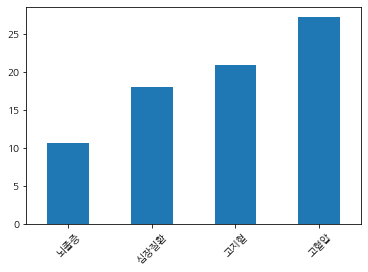

In [15]:
ax=(heart_corr.iloc[5].drop(labels=["BMI","당뇨"]).sort_values()*100).plot.bar(rot=45, y="당뇨병과의 연관성")

In [17]:
result=(heart_corr.iloc[5].drop(labels=["BMI","당뇨"]).sort_values()*100).to_json()
file = json.dumps(result,indent=4)
with open("Diabates_disease.json","w") as outfile :
        outfile.write(file)